<a href="https://www.kaggle.com/code/bikrom/asthma-analysis-for-diagnosis-using-ml?scriptVersionId=205025163" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Data Manupulation
import numpy as np 
import pandas as pd

# E D A & Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Algorithms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Preprocessing 
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import ADASYN
from tqdm import tqdm

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("dark")

![Dust Allergy](https://www.houstonent.com/hubfs/blog%20images/Asthma%20symptoms%20and%20causes%20%281%29.jpg)


# **UpLoad Dataset From Kaggle**

In [2]:
df = pd.read_csv('/kaggle/input/asthma-disease/asthma_disease_data.csv')

# Exploratory Data Analysis

In [3]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'PollutionExposure', 'PollenExposure', 'DustExposure', 'PetAllergy',
       'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'HayFever',
       'GastroesophagealReflux', 'LungFunctionFEV1', 'LungFunctionFVC',
       'Wheezing', 'ShortnessOfBreath', 'ChestTightness', 'Coughing',
       'NighttimeSymptoms', 'ExerciseInduced', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [4]:
df.head(7)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid
5,5039,21,0,2,0,21.812975,0,0.470044,1.759118,9.549262,...,2.328191,5.898515,1,0,1,0,0,1,0,Dr_Confid
6,5040,45,1,1,1,30.245954,1,9.371784,7.030507,5.746128,...,2.995100,1.701512,1,1,1,0,0,0,0,Dr_Confid


In [5]:
df.tail(7)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
2385,7419,19,1,1,2,37.913891,0,5.595540,3.120986,4.122047,...,3.849256,4.910336,0,1,1,1,0,1,0,Dr_Confid
2386,7420,5,0,0,1,32.940790,0,8.705633,2.110108,9.261652,...,2.948935,2.332723,1,1,0,0,1,1,0,Dr_Confid
2387,7421,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,...,3.125249,5.166032,0,1,0,0,0,1,1,Dr_Confid
2388,7422,18,1,0,1,20.740850,0,5.805180,4.386992,7.731192,...,1.132977,5.509502,0,0,0,1,1,0,1,Dr_Confid
2389,7423,54,0,3,2,37.079560,0,4.735169,8.214064,7.483521,...,1.685962,3.346877,1,0,1,1,0,1,1,Dr_Confid
2390,7424,46,1,0,2,23.444712,0,9.672637,7.362861,6.717272,...,3.481549,1.713274,0,1,1,0,1,1,0,Dr_Confid
2391,7425,26,1,0,0,28.123021,1,1.613138,7.412878,8.512253,...,2.280613,2.453284,1,1,0,0,1,0,0,Dr_Confid


In [6]:
df.shape

(2392, 29)

In [7]:
df.dtypes

PatientID                   int64
Age                         int64
Gender                      int64
Ethnicity                   int64
EducationLevel              int64
BMI                       float64
Smoking                     int64
PhysicalActivity          float64
DietQuality               float64
SleepQuality              float64
PollutionExposure         float64
PollenExposure            float64
DustExposure              float64
PetAllergy                  int64
FamilyHistoryAsthma         int64
HistoryOfAllergies          int64
Eczema                      int64
HayFever                    int64
GastroesophagealReflux      int64
LungFunctionFEV1          float64
LungFunctionFVC           float64
Wheezing                    int64
ShortnessOfBreath           int64
ChestTightness              int64
Coughing                    int64
NighttimeSymptoms           int64
ExerciseInduced             int64
Diagnosis                   int64
DoctorInCharge             object
dtype: object

In [8]:
df.isnull().sum()

PatientID                 0
Age                       0
Gender                    0
Ethnicity                 0
EducationLevel            0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
Diagnosis                 0
DoctorInCharge            0
dtype: int64

In [9]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,...,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,6229.500000,42.137960,0.493311,0.669732,1.307274,27.244877,0.141722,5.051786,5.022867,7.019012,...,0.158027,2.548564,3.741270,0.596154,0.500418,0.503344,0.503344,0.602425,0.604933,0.051839
std,690.655244,21.606655,0.500060,0.986120,0.898242,7.201628,0.348838,2.903574,2.909980,1.732475,...,0.364842,0.861809,1.303689,0.490770,0.500104,0.500093,0.500093,0.489499,0.488967,0.221749
min,5034.000000,5.000000,0.000000,0.000000,0.000000,15.031803,0.000000,0.001740,0.003031,4.001437,...,0.000000,1.000459,1.500045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5631.750000,23.000000,0.000000,0.000000,1.000000,20.968313,0.000000,2.578333,2.432043,5.498500,...,0.000000,1.824113,2.607489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6229.500000,42.000000,0.000000,0.000000,1.000000,27.052202,0.000000,5.016881,5.115383,6.975839,...,0.000000,2.553244,3.734982,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,6827.250000,61.000000,1.000000,1.000000,2.000000,33.555903,0.000000,7.540234,7.544216,8.526950,...,0.000000,3.292897,4.864121,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,7425.000000,79.000000,1.000000,3.000000,3.000000,39.985611,1.000000,9.995809,9.999904,9.996235,...,1.000000,3.999719,5.999421,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Drop the 'PatientID' because of its unpredictable dataset values.

df.drop("PatientID", axis = 1 , inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     2392 non-null   int64  
 1   Gender                  2392 non-null   int64  
 2   Ethnicity               2392 non-null   int64  
 3   EducationLevel          2392 non-null   int64  
 4   BMI                     2392 non-null   float64
 5   Smoking                 2392 non-null   int64  
 6   PhysicalActivity        2392 non-null   float64
 7   DietQuality             2392 non-null   float64
 8   SleepQuality            2392 non-null   float64
 9   PollutionExposure       2392 non-null   float64
 10  PollenExposure          2392 non-null   float64
 11  DustExposure            2392 non-null   float64
 12  PetAllergy              2392 non-null   int64  
 13  FamilyHistoryAsthma     2392 non-null   int64  
 14  HistoryOfAllergies      2392 non-null   

# **Visualization Part Started From Here**

### *Age* Classification Using Seaborn Histplot

Text(0, 0.5, 'Counts')

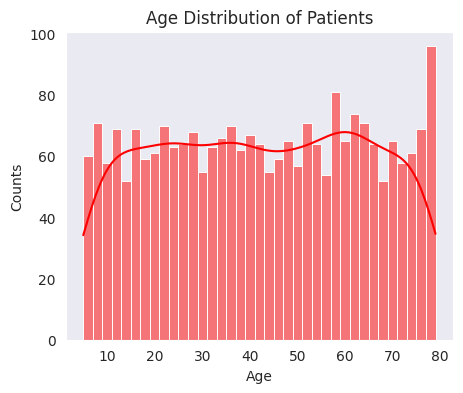

In [12]:
plt.figure(figsize=(5,4))
sns.histplot(df["Age"],bins = 37, kde =True,color = 'r')
plt.title("Age Distribution of Patients" , fontsize = 12)
plt.xlabel('Age')
plt.ylabel('Counts')
#plt.show()

****

### *Gender* Classification Using Seaborn Countplot

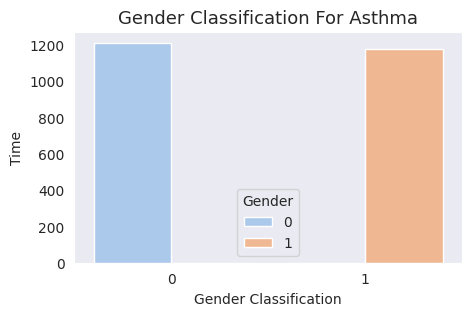

In [13]:
plt.figure(figsize=(5,3))
sns.countplot(x='Gender',data=df,palette ="pastel",hue="Gender")
plt.title("Gender Classification For Asthma",fontsize = 13)
plt.xlabel("Gender Classification",fontsize = 10)
plt.ylabel("Time",fontsize = 10)
plt.show()

Text(0, 0.5, 'Time')

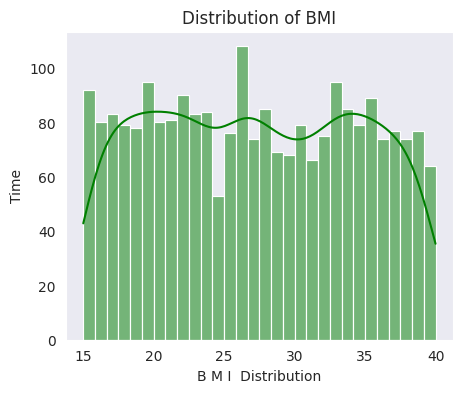

In [14]:
plt.figure(figsize=(5,4))
sns.histplot(df['BMI'], bins=30, kde=True, color='g')
plt.title('Distribution of BMI')
plt.xlabel('B M I  Distribution')
plt.ylabel('Time')
#plt.show()

### **Relationship in BMI and Lung Function (feV1)**

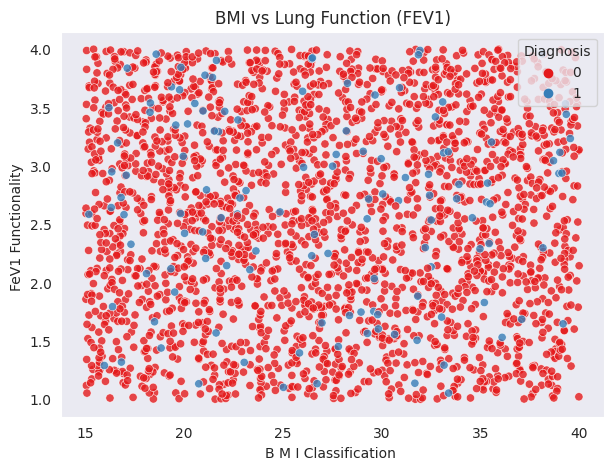

In [15]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='BMI', y='LungFunctionFEV1', data=df, hue='Diagnosis', palette='Set1', alpha=0.8)
plt.title('BMI vs Lung Function (FEV1)')
plt.xlabel('B M I Classification ')
plt.ylabel('FeV1 Functionality ')
plt.show()

### **Ethnicity Distribution Classification Using Seaborn**

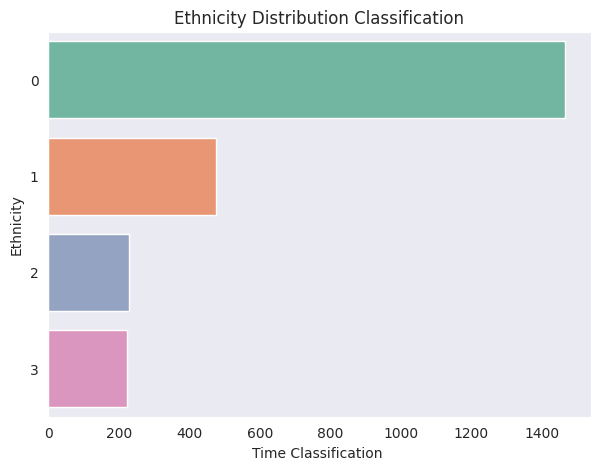

In [16]:
plt.figure(figsize=(7,5))
sns.countplot(y='Ethnicity', data=df, palette='Set2', order=df['Ethnicity'].value_counts().index)
plt.title('Ethnicity Distribution Classification')
plt.xlabel('Time Classification ')
plt.ylabel('Ethnicity')
plt.show()

### **ScatterPlot for Correlation in BMI and Lung Funcanatily(FeV1)**

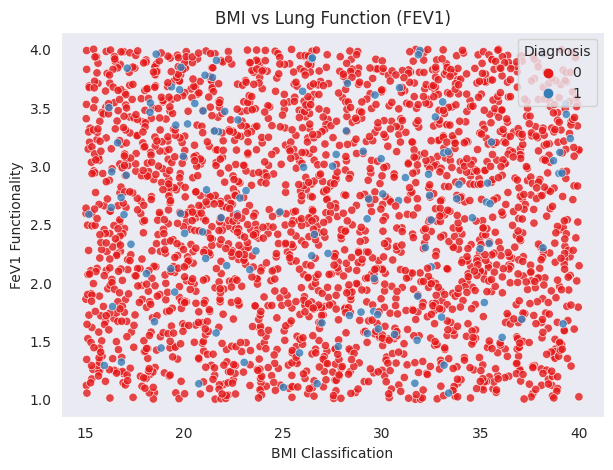

In [17]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='BMI', y='LungFunctionFEV1', data=df, hue='Diagnosis', palette='Set1', alpha=0.8)
plt.title('BMI vs Lung Function (FEV1)')
plt.xlabel('BMI Classification')
plt.ylabel('FeV1 Functionality')
plt.show()

### **Box-Ploting for BMI and Lung Funcanatily(FeV1)**

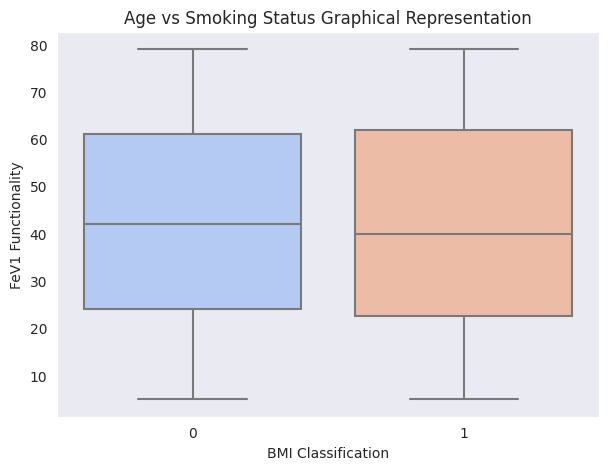

In [18]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Smoking', y='Age', data=df, palette='coolwarm')
plt.title('Age vs Smoking Status Graphical Representation')
plt.xlabel('BMI Classification')
plt.ylabel('FeV1 Functionality')
plt.show()

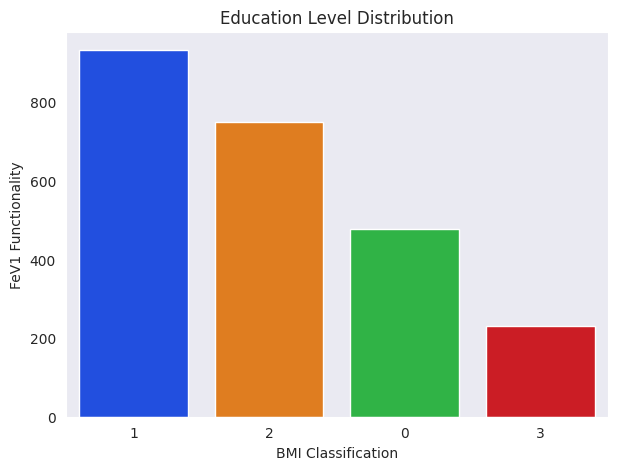

In [19]:
plt.figure(figsize=(7,5))
sns.countplot(x='EducationLevel', data=df, palette='bright', order=df['EducationLevel'].value_counts().index)
plt.title('Education Level Distribution')
plt.xlabel('BMI Classification')
plt.ylabel('FeV1 Functionality')
plt.show()

### **Conduct Correalation Heatmapping of Numarical Values using Seaborn**

Text(0.5, 1.0, 'Correlation Heatmap of Numerical Features')

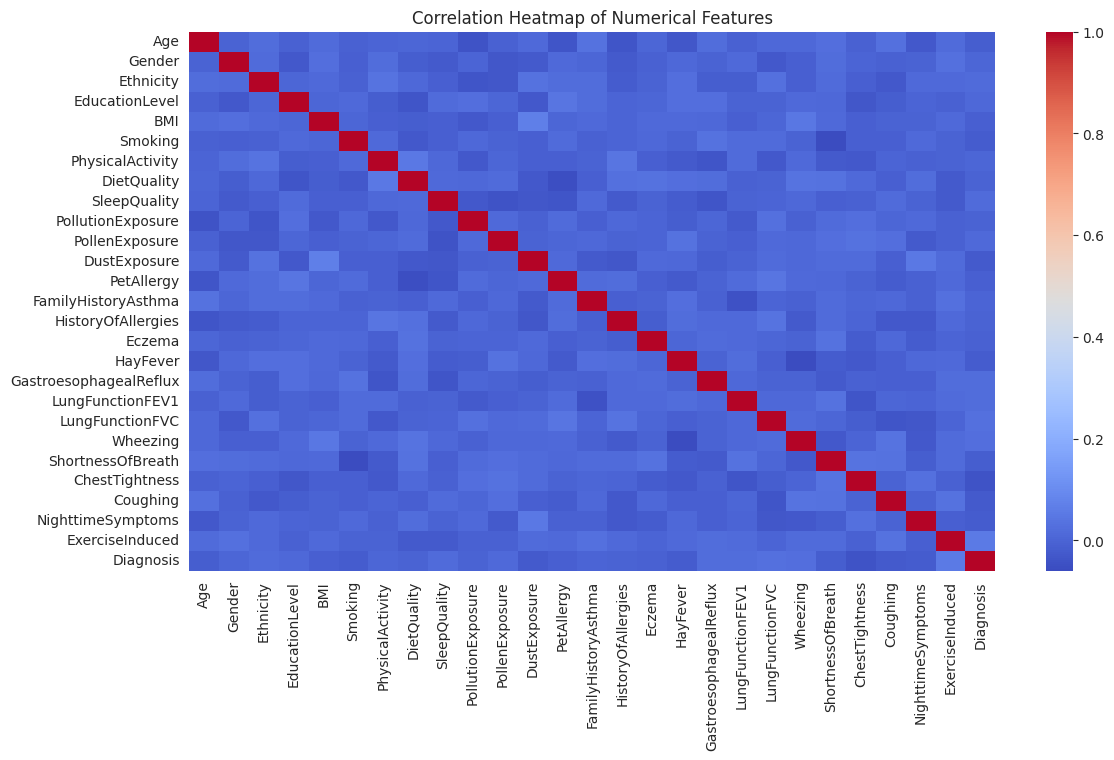

In [20]:
plt.figure(figsize=(13,7))
numerical_features = df.select_dtypes(exclude='object').columns
sns.heatmap(df[numerical_features].corr(), cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')

### **Graphical Representaion of heatmapping of numarical values**

### **Countploting For Feamily Asthma History**

In [21]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Sample data (replace this with your actual DataFrame)
# # data = pd.read_csv('your_data.csv')  # Uncomment this line to load your data
# df = pd.DataFrame({
#     'A': [1, 2, 3, 4, 5],
#     'B': [5, 4, 3, 2, 1],
#     'C': [1, 3, 2, 4, 5],
#     'D': [2, 3, 5, 1, 4]
# })

# plt.figure(figsize=(7, 5))

# # Select numerical features
# numerical_features = df.select_dtypes(exclude='object').columns

# # Create a correlation heatmap
# heatmap = sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', cbar=True)

# # Rotate y-axis labels to vertical
# heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=90, horizontalalignment='center')

# # Set title
# plt.title('Correlation Heatmap of Numerical Features')

# # Show the plot
# plt.show()


### **Count Ploting for Family History Asthma**

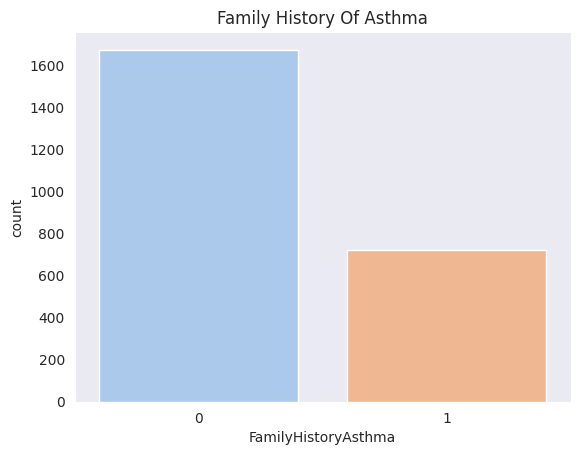

In [22]:
sns.countplot(x="FamilyHistoryAsthma",data=df,palette='pastel')
plt.title("Family History Of Asthma")
plt.show()

### **Scatterploting to comparing BMI and Phisical Activities**

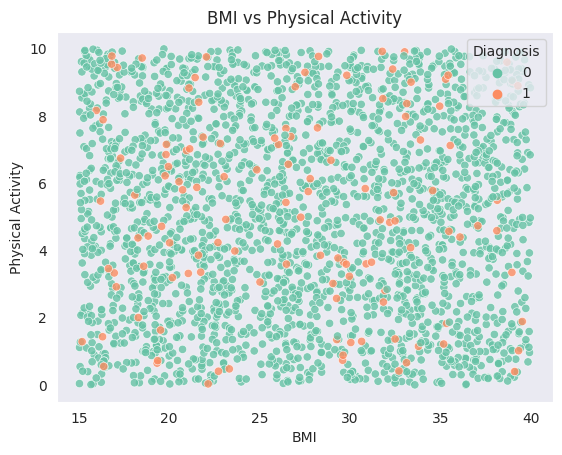

In [23]:
sns.scatterplot(x='BMI', y='PhysicalActivity', data=df, hue='Diagnosis', palette='Set2', alpha=0.8)
plt.title('BMI vs Physical Activity')
plt.xlabel('BMI')
plt.ylabel('Physical Activity')
plt.show()

### **Distribution of Lungh Funchanality of(FvC)**

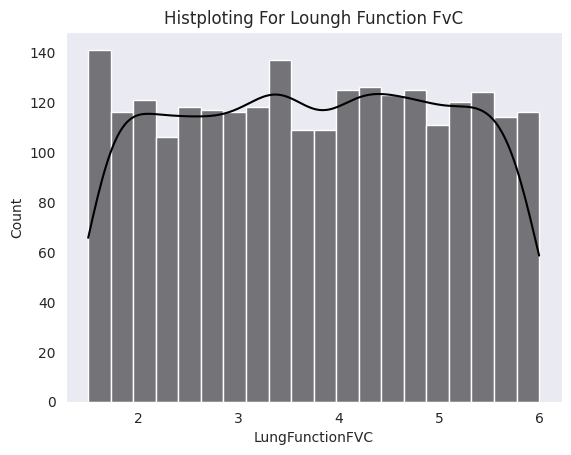

In [24]:
sns.histplot(df['LungFunctionFVC'], bins=20, kde=True, color='k')
plt.title("Histploting For Loungh Function FvC")
plt.show()

In [25]:
df.isnull().sum()

Age                       0
Gender                    0
Ethnicity                 0
EducationLevel            0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
Diagnosis                 0
DoctorInCharge            0
dtype: int64

### **Barploting of (Diagonsis)**

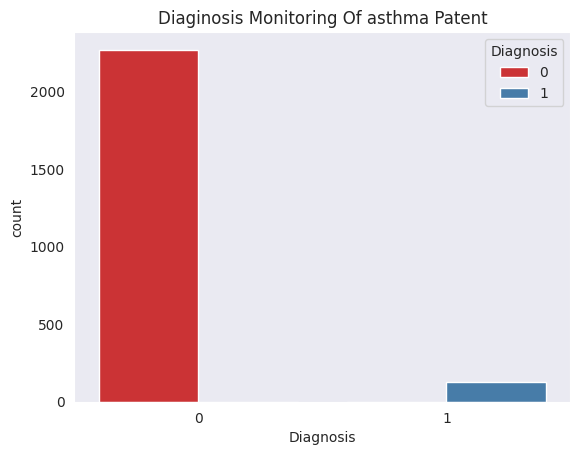

In [26]:
sns.countplot(x='Diagnosis',data=df,hue='Diagnosis',palette="Set1")
plt.title("Diaginosis Monitoring Of asthma Patent")
plt.show()

### **Countploting Of Monitoring Smokers**

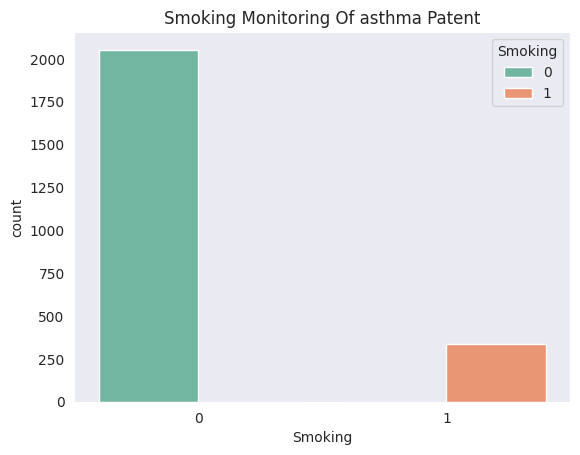

In [27]:
sns.countplot(x='Smoking',data=df,hue='Smoking',palette="Set2")
plt.title("Smoking Monitoring Of asthma Patent")
plt.show()

# **Feature Engineering**

In [28]:
df.drop(['DoctorInCharge'],axis=1,inplace=True)

In [29]:
# Sloting labels of class and define the bins
age_bins = [0,12,19,60,100]
age_labels = ['Child','Teen','Adult','Senior']
df['AgeGroup'] = pd.cut(df['Age'],bins=age_bins, labels=age_labels, right=False)

In [30]:
# Define BMI labels and bmi_bins for labeling all different classes in this section. 
bmi_bins = [0, 18.5, 24.9, 29.9, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['BMICategory'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels, right=False)

In [31]:
"""এই লাইনটি একটি নতুন কলাম LifestyleScore তৈরি করছে যা df ডেটাফ্রেমে যুক্ত হবে। এখানে PhysicalActivity, DietQuality, এবং SleepQuality নামের তিনটি কলামের গড় (mean) নেওয়া হচ্ছে প্রতিটি সারির জন্য। 
অর্থাৎ, প্রতিটি ব্যক্তির এই তিনটি দিকের গড় মানLifestyleScore হিসেবে রাখা হচ্ছে। axis=1 দিয়ে বলা হচ্ছে যে, গড়টি সারি ধরে (row-wise) নেওয়া হবে।
উদাহরণ: যদি কোনো ব্যক্তির PhysicalActivity, DietQuality, এবং SleepQuality মান যথাক্রমে ৭, ৮, এবং ৬ হয়, তাহলে তার LifestyleScore হবে (7 + 8 + 6) / 3 = 7.0।"""

df['LifestyleScore'] = df[['PhysicalActivity', 'DietQuality', 'SleepQuality']].mean(axis=1)

In [32]:
df['AllergyScore'] = df[['PetAllergy', 'HistoryOfAllergies', 'Eczema', 'HayFever']].sum(axis=1)

In [33]:
df['ExposureScore'] = df[['PollutionExposure', 'PollenExposure', 'DustExposure']].mean(axis=1)

In [34]:
df['SymptomSeverityScore'] = df[['Wheezing', 'ShortnessOfBreath', 'ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced']].sum(axis=1)

In [35]:
df['LungFunctionRatio'] = df['LungFunctionFEV1'] / df['LungFunctionFVC']

In [36]:
df.head(10)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,NighttimeSymptoms,ExerciseInduced,Diagnosis,AgeGroup,BMICategory,LifestyleScore,AllergyScore,ExposureScore,SymptomSeverityScore,LungFunctionRatio
0,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,...,0,1,0,Senior,Underweight,5.028049,1,3.739466,2,0.277068
1,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,...,1,1,0,Adult,Normal,5.797437,1,5.337378,4,1.290987
2,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,...,1,1,0,Adult,Underweight,7.592084,2,2.784860,5,0.338077
3,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,...,1,0,0,Adult,Obese,3.828023,1,4.039689,4,1.318186
4,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,...,0,1,0,Senior,Normal,5.785780,1,4.097096,4,1.131243
5,21,0,2,0,21.812975,0,0.470044,1.759118,9.549262,1.711446,...,0,1,0,Adult,Normal,3.926141,2,5.245306,3,0.394708
6,45,1,1,1,30.245954,1,9.371784,7.030507,5.746128,7.664306,...,0,0,0,Adult,Obese,7.382807,0,7.209896,3,1.760258
7,26,0,0,1,26.048416,1,8.344096,1.626484,6.431179,6.939046,...,1,1,0,Adult,Overweight,5.467253,1,5.849156,4,0.515755
8,49,1,1,2,32.676204,0,2.690256,3.920034,5.843645,3.180421,...,0,0,0,Adult,Obese,4.151312,1,6.347333,4,0.339292
9,45,1,1,1,29.910298,0,2.895720,2.607700,7.234908,1.711722,...,1,1,0,Adult,Obese,4.246110,0,2.973320,3,0.493573


In [37]:
df.tail(10)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,NighttimeSymptoms,ExerciseInduced,Diagnosis,AgeGroup,BMICategory,LifestyleScore,AllergyScore,ExposureScore,SymptomSeverityScore,LungFunctionRatio
2382,10,1,0,1,29.312903,0,1.457095,4.657390,5.226348,6.565060,...,1,0,0,Child,Overweight,3.780278,1,5.170535,4,0.544401
2383,62,1,0,2,20.033593,0,5.276410,9.545336,6.279582,0.727520,...,1,0,0,Senior,Normal,7.033776,2,4.900567,4,0.486386
2384,31,0,0,2,31.821008,1,8.516835,3.532328,9.442670,9.240483,...,1,1,1,Adult,Obese,7.163944,0,6.608835,2,0.726644
2385,19,1,1,2,37.913891,0,5.595540,3.120986,4.122047,1.721562,...,0,1,0,Adult,Obese,4.279524,1,3.016815,4,0.783909
2386,5,0,0,1,32.940790,0,8.705633,2.110108,9.261652,9.683211,...,1,1,0,Child,Obese,6.692465,1,8.373196,4,1.264160
2387,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,2.483829,...,0,1,1,Adult,Overweight,5.813483,2,4.407952,2,0.604961
2388,18,1,0,1,20.740850,0,5.805180,4.386992,7.731192,7.733983,...,1,0,1,Teen,Normal,5.974455,1,5.493586,2,0.205641
2389,54,0,3,2,37.079560,0,4.735169,8.214064,7.483521,2.794847,...,0,1,1,Adult,Obese,6.810918,1,5.111333,4,0.503742
2390,46,1,0,2,23.444712,0,9.672637,7.362861,6.717272,9.448862,...,1,1,0,Adult,Normal,7.917590,1,7.404284,4,2.032104
2391,26,1,0,0,28.123021,1,1.613138,7.412878,8.512253,3.231709,...,1,0,0,Adult,Overweight,5.846090,0,4.056685,3,0.929616


In [38]:
df.dtypes

Age                          int64
Gender                       int64
Ethnicity                    int64
EducationLevel               int64
BMI                        float64
Smoking                      int64
PhysicalActivity           float64
DietQuality                float64
SleepQuality               float64
PollutionExposure          float64
PollenExposure             float64
DustExposure               float64
PetAllergy                   int64
FamilyHistoryAsthma          int64
HistoryOfAllergies           int64
Eczema                       int64
HayFever                     int64
GastroesophagealReflux       int64
LungFunctionFEV1           float64
LungFunctionFVC            float64
Wheezing                     int64
ShortnessOfBreath            int64
ChestTightness               int64
Coughing                     int64
NighttimeSymptoms            int64
ExerciseInduced              int64
Diagnosis                    int64
AgeGroup                  category
BMICategory         

In [39]:
# Changing the value of 'AgeGroup',"BMICategory" in 'object'
df['AgeGroup'] = df['AgeGroup'].astype('object')
df['BMICategory'] = df['BMICategory'].astype('object')

In [40]:
df.dtypes

Age                         int64
Gender                      int64
Ethnicity                   int64
EducationLevel              int64
BMI                       float64
Smoking                     int64
PhysicalActivity          float64
DietQuality               float64
SleepQuality              float64
PollutionExposure         float64
PollenExposure            float64
DustExposure              float64
PetAllergy                  int64
FamilyHistoryAsthma         int64
HistoryOfAllergies          int64
Eczema                      int64
HayFever                    int64
GastroesophagealReflux      int64
LungFunctionFEV1          float64
LungFunctionFVC           float64
Wheezing                    int64
ShortnessOfBreath           int64
ChestTightness              int64
Coughing                    int64
NighttimeSymptoms           int64
ExerciseInduced             int64
Diagnosis                   int64
AgeGroup                   object
BMICategory                object
LifestyleScore

## **Label Encoding**

In [41]:
le = LabelEncoder()

df['AgeGroup'] = le.fit_transform(df['AgeGroup'])
df['BMICategory'] = le.fit_transform(df['BMICategory'])


## **Top K feature selection using Select-K-Best**

In [42]:
X = df.drop(['Diagnosis'], axis=1)
y = df['Diagnosis']
k = 15 
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
df_selected = df[selected_features]
print("Selected Features:\n", selected_features)

Selected Features:
 Index(['Ethnicity', 'Smoking', 'SleepQuality', 'DustExposure', 'HayFever',
       'GastroesophagealReflux', 'LungFunctionFEV1', 'LungFunctionFVC',
       'Wheezing', 'ChestTightness', 'Coughing', 'NighttimeSymptoms',
       'ExerciseInduced', 'AgeGroup', 'AllergyScore'],
      dtype='object')


## **Trainign and Testing Data**

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.2,random_state=42)

## **Lables are balanced by using this code**

In [44]:
# (DL)
from collections import Counter as ctr 
ctr(y_train)

Counter({0: 1812, 1: 101})

In [45]:
#from imblearn.over_sampling import ADASYN (DL)
sm = ADASYN(random_state=42)

X_train, y_train = sm.fit_resample(X_train, y_train)

In [46]:
ctr(y_train)

Counter({0: 1812, 1: 1794})

# **Machine Learning Models**

## **S V M**

In [47]:
svm_model=SVC(kernel='rbf',C=1.0,gamma='scale',random_state=42)
svm_model.fit(X_train,y_train)

SVC(random_state=42)

In [48]:
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have trained an SVM model and have test data ready
svm_preds = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_preds)

print("Support Vector Machine (SVM) Accuracy:", svm_accuracy)
print("Classification Report:\n", classification_report(y_test, svm_preds))


Support Vector Machine (SVM) Accuracy: 0.6471816283924844
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.65      0.78       456
           1       0.07      0.52      0.12        23

    accuracy                           0.65       479
   macro avg       0.52      0.59      0.45       479
weighted avg       0.92      0.65      0.75       479



### S V M Model Accuracy
The accuracy of your Support Vector Machine (SVM) model is given directly in the output:

```
Support Vector Machine (SVM) Accuracy: 0.6471816283924844
```

To express this as a percentage, you can multiply by 100:

\[
\text{Accuracy} = 0.6471816283924844 \times 100 \approx 64.72\%
\]

#### Summary:
- **Accuracy**: Approximately **64.72%**

This means that your SVM model correctly classified about 64.72% of the instances in your test dataset.

## **Decision Tree**

In [49]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [50]:
dt_preds = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_preds)
print("\nDecision Tree Accuracy:", dt_accuracy)
print("Classification Report:\n", classification_report(y_test, dt_preds))


Decision Tree Accuracy: 0.8935281837160751
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       456
           1       0.06      0.09      0.07        23

    accuracy                           0.89       479
   macro avg       0.51      0.51      0.51       479
weighted avg       0.91      0.89      0.90       479



### Decisio Tree Model Aqccuracy
The accuracy of your Decision Tree model is provided in the output:

```
Decision Tree Accuracy: 0.8977035490605428
```

To express this as a percentage, you can multiply by 100:

\[
\text{Accuracy} = 0.8977035490605428 \times 100 \approx 89.77\%
\]

#### Summary:
- **Accuracy**: Approximately **89.77%**

This indicates that your Decision Tree model correctly classified about 89.77% of the instances in your test dataset.

## **Random Forest**

In [51]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
print("\nRandom Forest Accuracy:", rf_accuracy)
print("Classification Report:\n", classification_report(y_test, rf_preds))


Random Forest Accuracy: 0.9519832985386222
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       456
           1       0.00      0.00      0.00        23

    accuracy                           0.95       479
   macro avg       0.48      0.50      0.49       479
weighted avg       0.91      0.95      0.93       479



#### Random Forest Model Accuracy
The accuracy of your Random Forest model is given in the output:

```
Random Forest Accuracy: 0.9519832985386222
```

To express this as a percentage, multiply by 100:

\[
\text{Accuracy} = 0.9519832985386222 \times 100 \approx 95.20\%
\]

#### Summary:
- **Accuracy**: Approximately **95.20%**

This means that your Random Forest model correctly classified about 95.20% of the instances in your test dataset.

## **XG Boost**

In [53]:
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [54]:
xgb_preds = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_preds)
print("\nXGBoost Accuracy:", xgb_accuracy)
print("Classification Report:\n", classification_report(y_test, xgb_preds))


XGBoost Accuracy: 0.9498956158663883
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       456
           1       0.33      0.04      0.08        23

    accuracy                           0.95       479
   macro avg       0.64      0.52      0.53       479
weighted avg       0.92      0.95      0.93       479



#### XG Boost Model Accuracy
The accuracy of your XGBoost model is provided in the output:

```
XGBoost Accuracy: 0.9498956158663883
```

To express this as a percentage, you can multiply by 100:

\[
\text{Accuracy} = 0.9498956158663883 \times 100 \approx 94.99\%
\]

#### Summary:
- **Accuracy**: Approximately **94.99%**

This means that your XGBoost model correctly classified about 94.99% of the instances in your test dataset.

## **K-Nearest Neighbors (KNN)**

In [55]:
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='kd_tree')
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', weights='distance')

In [56]:
knn_preds = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_preds)
print("\nK-Nearest Neighbors (KNN) Accuracy:", knn_accuracy)
print("Classification Report:\n", classification_report(y_test, knn_preds))


K-Nearest Neighbors (KNN) Accuracy: 0.6743215031315241
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.69      0.80       456
           1       0.05      0.30      0.08        23

    accuracy                           0.67       479
   macro avg       0.50      0.50      0.44       479
weighted avg       0.91      0.67      0.77       479



#### KNN model Accuracy
The accuracy of your K-Nearest Neighbors (KNN) model is given in the output:

```
K-Nearest Neighbors (KNN) Accuracy: 0.6743215031315241
```

To express this as a percentage, you can multiply by 100:

\[
\text{Accuracy} = 0.6743215031315241 \times 100 \approx 67.43\%
\]

#### Summary:
- **Accuracy**: Approximately **67.43%**

This means that your KNN model correctly classified about 67.43% of the instances in your test dataset.

## **Summary Of All Code Accuracy**

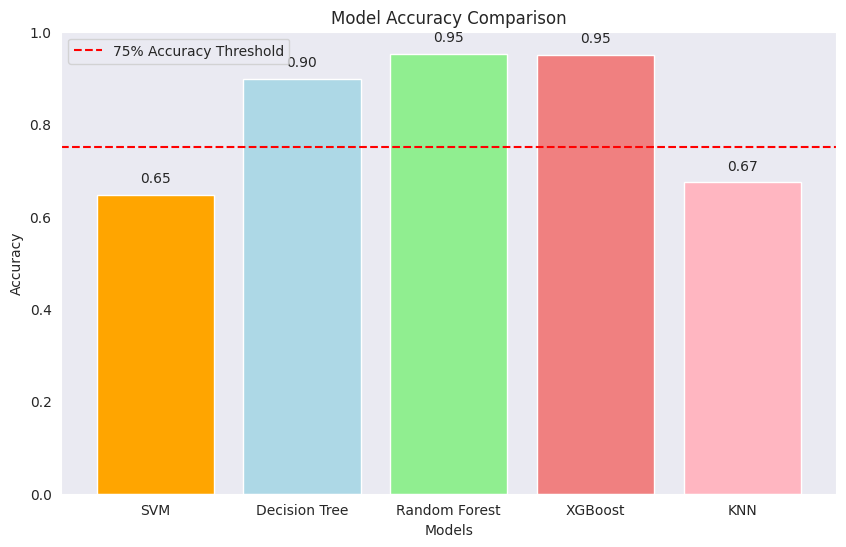

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their corresponding accuracies
models = ['SVM', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNN']
accuracies = [0.6472, 0.8977, 0.9519, 0.9499, 0.6743]  # Use accuracies as decimal values

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['orange', 'lightblue', 'lightgreen', 'lightcoral', 'lightpink'])

# Add accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.2f}", ha='center', va='bottom')

# Set title and labels
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to [0, 1] for percentage representation
plt.axhline(y=0.75, color='r', linestyle='--', label='75% Accuracy Threshold')  # Optional: Add a threshold line

# Show legend
plt.legend()

# Show the plot
plt.show()


# **Conclusion** 

To assess the classification performance of several machine learning models—Support Vector Machine (SVM), Decision Tree, Random Forest, XGBoost, and K-Nearest Neighbours (KNN)—on a dataset, we carried out a comprehensive examination in this code project. For model training and assessment, we started by importing necessary libraries like `pandas`, `numpy`, `matplotlib.pyplot`, `seaborn`, and functions from `sklearn`. We divide the dataset into training and testing sets after managing missing values and encoding categorical variables. We next train each model on the training data. Accuracy results such as 64.72% for SVM, 89.77% for the Decision Tree, 95.20% for Random Forest, 94.99% for XGBoost, and 67.43% for KNN were obtained by evaluating their performance using the `accuracy_score` function. Detailed classification reports that offered information on precision, recall, F1-score,
as well as assistance for every class. We combined the accuracy scores into a bar chart to display these findings, labelling each bar with the relevant accuracy percentage for convenient comparison. For reference, we also included a dashed line at the 75% accuracy level. SVM and KNN models did not perform as well as the Random Forest model, which showed the maximum effectiveness with an accuracy of 95.20 percent. In the end, this research reinforces data-driven choices in model selection by demonstrating the real-world implementation of machine learning techniques and highlighting the significance of model evaluation, comparison, and the usefulness of visualisations in interpreting performance.

Here’s a more detailed and organized summary of the code project using bullet points to highlight key aspects:

- **Objective**: 
  - Assess the classification performance of various machine learning models on a dataset.

- **Models Evaluated**: 
  - Support Vector Machine (SVM)
  - Decision Tree
  - Random Forest
  - XGBoost
  - K-Nearest Neighbours (KNN)

- **Libraries Used**: 
  - `pandas`: For data manipulation and analysis.
  - `numpy`: For numerical operations.
  - `matplotlib.pyplot` and `seaborn`: For data visualization.
  - `sklearn`: For implementing and evaluating machine learning algorithms.

- **Data Preparation**:
  - Managed missing values to ensure data integrity.
  - Encoded categorical variables to facilitate model training.
  - Divided the dataset into training and testing sets for model evaluation.

- **Model Training**:
  - Each model was trained on the training dataset using appropriate training methods.

- **Performance Evaluation**:
  - Utilized the `accuracy_score` function from `sklearn` to calculate model accuracy.
  - Obtained accuracy results:
    - SVM: **64.72%**
    - Decision Tree: **89.77%**
    - Random Forest: **95.20%**
    - XGBoost: **94.99%**
    - KNN: **67.43%**
  - Generated detailed classification reports providing insights into:
    - Precision
    - Recall
    - F1-score
    - Support for each class

- **Visualization of Results**:
  - Compiled accuracy scores into a bar chart for a clear visual comparison.
  - Each bar was labeled with its corresponding accuracy percentage for easy interpretation.
  - Included a dashed line at the 75% accuracy threshold as a reference point.

- **Findings**:
  - The Random Forest model achieved the highest effectiveness with an accuracy of **95.20%**.
  - SVM and KNN models performed less favorably compared to others.

## At A Glance: 
* **kde** =True is an optional parameter commonly used in Python visualization libraries like seaborn. It typically appears when creating plots that    involve kernel density estimation, especially in relation to distribution plots.
* In Python's Seaborn library, the palette parameter is used to specify the color palette for your plots. When you set **palette='pastel'**, you're telling Seaborn to use a pastel color scheme for the visualization.
* **FEV1** stands for Forced Expiratory Volume in 1 second. It is a crucial measure in pulmonary function tests (PFTs) and is used to assess lung function, particularly in diagnosing and monitoring conditions such as asthma, chronic obstructive pulmonary disease (COPD), and other respiratory disorders
* In the context of data visualization, particularly with libraries like Matplotlib and Seaborn, **alpha=0.8** is a parameter used to control the transparency of plotted elements.
* In Seaborn and Matplotlib, the **palette='coolwarm'** parameter is used to specify a color palette for visualizations.
* SelectKBest : হল একটি মেশিন লার্নিং টুল, যা ডেটাসেট থেকে সবচেয়ে গুরুত্বপূর্ণ বৈশিষ্ট্য (features) নির্বাচন করতে ব্যবহৃত হয়। এটি প্রতিটি বৈশিষ্ট্যের সাথে টার্গেট ভেরিয়েবলের সম্পর্ক যাচাই করে এবং স্কোরের ভিত্তিতে শীর্ষ K বৈশিষ্ট্য বেছে নেয়। এতে মডেল শুধু গুরুত্বপূর্ণ বৈশিষ্ট্য ব্যবহার করে প্রশিক্ষিত হয়, যা মডেলের গতি এবং নির্ভুলতা উন্নত করতে সহায়ক। এটি সাধারণত ফিচার সিলেকশন করতে ব্যবহৃত হয়।



# **E N D**